In [53]:
# Qunatum CDMA

In [54]:
############################

In [55]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.circuit.library import QFT
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector, plot_state_city
%matplotlib inline
import numpy as np

In [56]:
def show_statevec(sv, title=""):
    print("\n" + "="*70)
    print(title)
    print("="*70)
    
    # Print non-zero amplitudes
    for i, amp in enumerate(sv.data):
        if abs(amp) > 1e-6:
            print(f"|{i:010b}>  {amp}")
            
    # Plot Bloch vectors
    fig = plot_bloch_multivector(sv)
    fig.suptitle(title)
    plt.show()


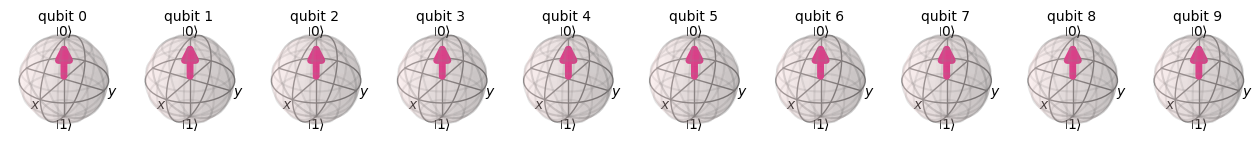

Figure(162.08x953.167)


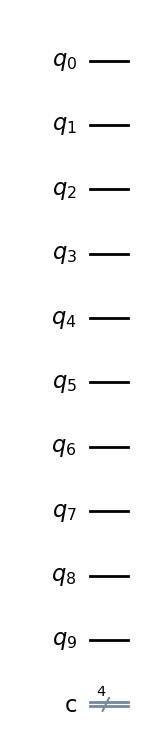


Initial: |0000000000>
|0000000000>  (1+0j)


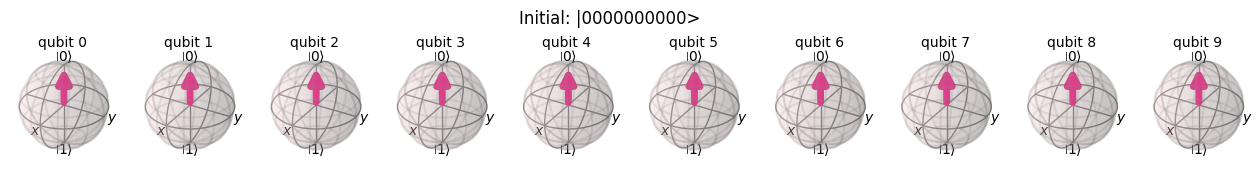

In [57]:
qr = QuantumRegister(10, "q")
cr = ClassicalRegister(4, "c")   # For M1..M4
qc = QuantumCircuit(qr, cr)

# Simulate initial state
state_vector= Statevector.from_instruction(qc)
plot_bloch_multivector(state_vector)
plt.show()
print(qc.draw('mpl'))
plt.show()
show_statevec(state_vector, "Initial: |0000000000>")


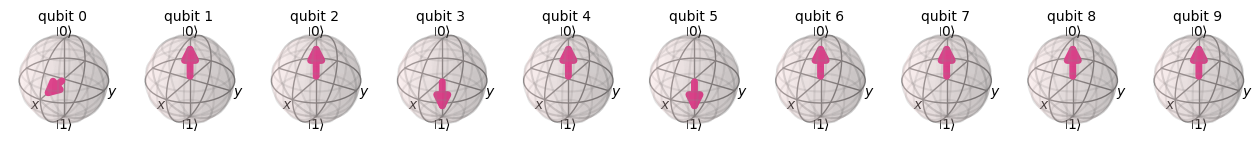

Figure(203.885x953.167)


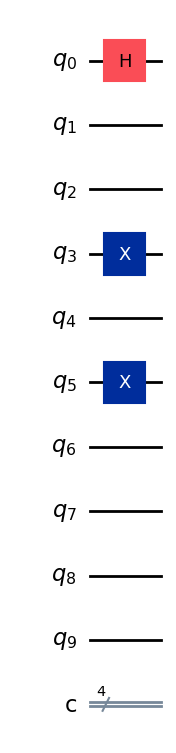


After Step 2: Prepare Input (H on D1, setting C1y & C2y)
|0000101000>  (0.7071067811865475+0j)
|0000101001>  (0.7071067811865475+0j)


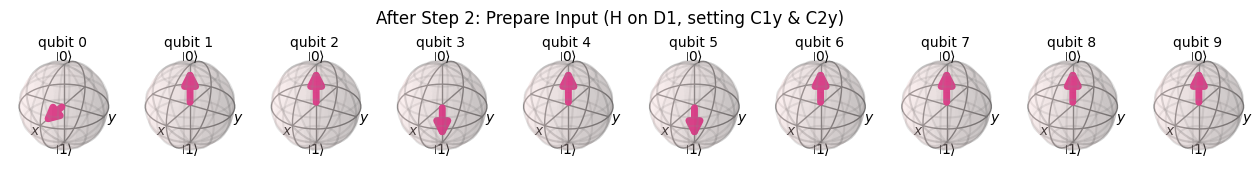

In [58]:
# H on D1
qc.h(0)

# C1y = 1, C2y = 1
qc.x(3)
qc.x(5)

state_vector= Statevector.from_instruction(qc)
plot_bloch_multivector(state_vector)
plt.show()
print(qc.draw('mpl'))
plt.show()
show_statevec(state_vector, "After Step 2: Prepare Input (H on D1, setting C1y & C2y)")



After Step 3: CDMA Encoding
|0000101000>  (0.7071067811865475+0j)
|0000111101>  (0.7071067811865475+0j)


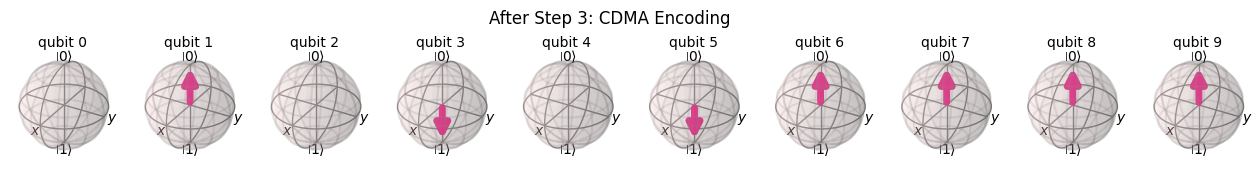

Figure(538.33x953.167)


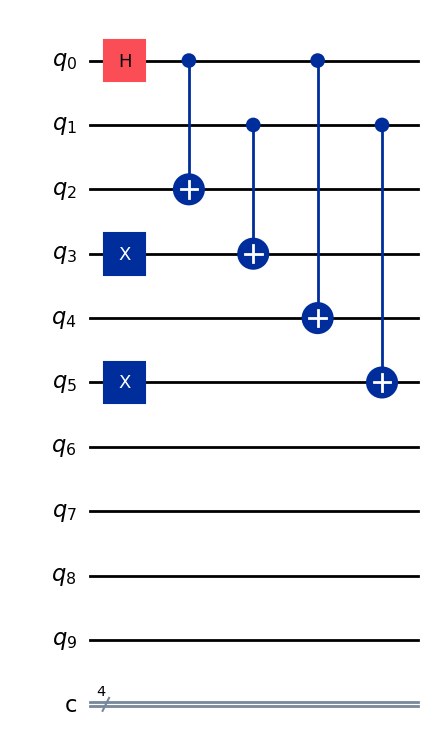

In [59]:
qc.cx(0, 2)   # D1 -> C1x
qc.cx(0, 4)   # D1 -> C2x
qc.cx(1, 3)   # D2 -> C1y
qc.cx(1, 5)   # D2 -> C2y

sv_before_QFT_CDMA_Encoding= Statevector.from_instruction(qc)
show_statevec(sv_before_QFT_CDMA_Encoding, "After Step 3: CDMA Encoding")
print(qc.draw('mpl'))
plt.show()


After Step 4: QFT applied to 4 code qubits
|0000000000>  (0.1767766952966368+0j)
|0000000001>  (0.1767766952966368+0j)
|0000000100>  (0.1767766952966368+0j)
|0000000101>  (-0.1767766952966368+0j)
|0000001000>  (-0.1767766952966368+0j)
|0000001001>  (-1.0824450702943661e-17-0.1767766952966368j)
|0000001100>  (-0.1767766952966368+0j)
|0000001101>  (1.0824450702943661e-17+0.1767766952966368j)
|0000010000>  (1.0824450702943661e-17+0.1767766952966368j)
|0000010001>  (0.12499999999999994-0.12499999999999996j)
|0000010100>  (1.0824450702943661e-17+0.1767766952966368j)
|0000010101>  (-0.12499999999999994+0.12499999999999996j)
|0000011000>  (-1.0824450702943661e-17-0.1767766952966368j)
|0000011001>  (-0.12499999999999996-0.12499999999999994j)
|0000011100>  (-1.0824450702943661e-17-0.1767766952966368j)
|0000011101>  (0.12499999999999996+0.12499999999999994j)
|0000100000>  (-0.12499999999999996-0.12499999999999996j)
|0000100001>  (0.163320370609547-0.0676495125182746j)
|0000100100>  (-0.12499999

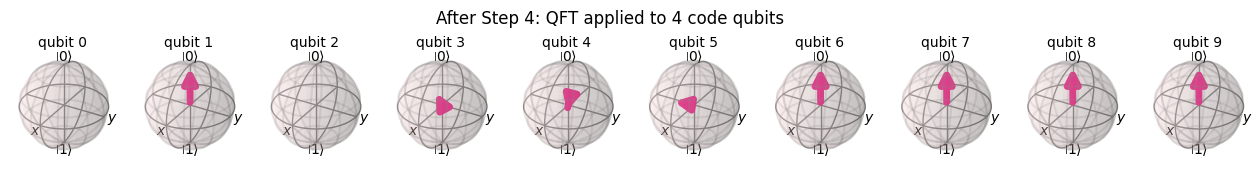

Figure(621.941x953.167)


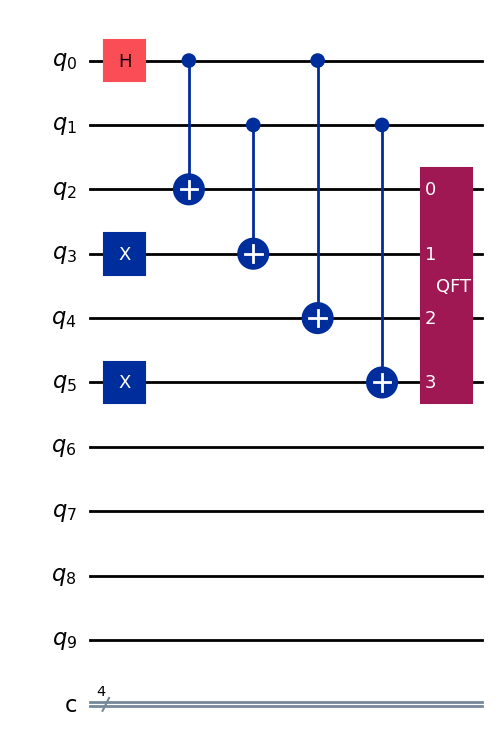

In [60]:
qft4 = QFT(4, do_swaps=False)

qc.append(qft4, [2,3,4,5])

sv_after_QFT= Statevector.from_instruction(qc)
show_statevec(sv_after_QFT, "After Step 4: QFT applied to 4 code qubits")
print(qc.draw('mpl'))
plt.show()


After Step 5: Inverse QFT
|0000101000>  (0.7071067811865471+1.5407439555097883e-33j)
|0000111101>  (0.707106781186547-2.065674716607785e-17j)


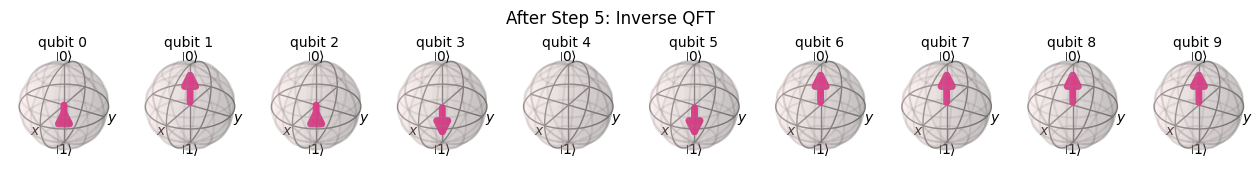

Figure(705.552x953.167)


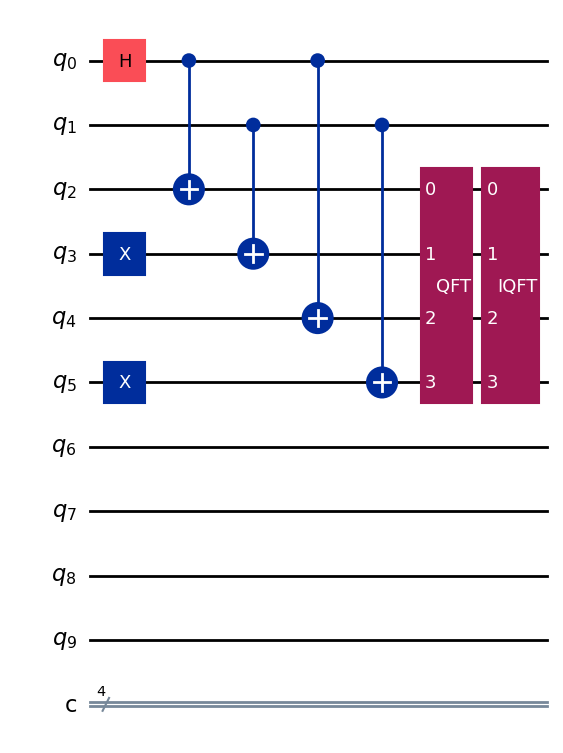

In [61]:
qc.append(qft4.inverse(), [2,3,4,5])

sv_after_IQFT= Statevector.from_instruction(qc)
show_statevec(sv_after_IQFT, "After Step 5: Inverse QFT")
print(qc.draw('mpl'))
plt.show()


After Step 7: CDMA Decoding
|0000101000>  (0.7071067811865471+1.5407439555097883e-33j)
|0000111001>  (0.707106781186547-2.065674716607785e-17j)


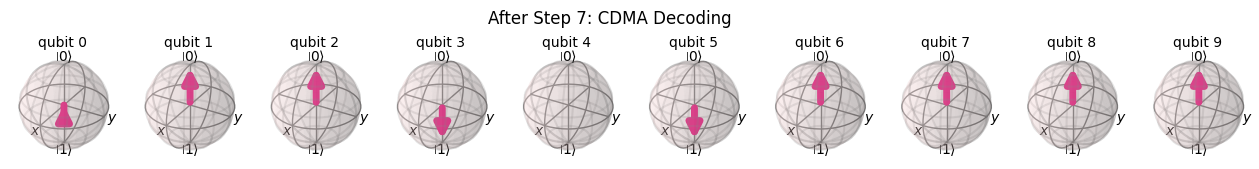

In [62]:
qc.cx(0, 2)
sv_CDMA_Decoding = Statevector.from_instruction(qc)
show_statevec(sv_CDMA_Decoding, "After Step 7: CDMA Decoding")


After Step 7: CDMA Decoding
|0000101000>  (0.7071067811865471+1.5407439555097883e-33j)
|0000101001>  (0.707106781186547-2.065674716607785e-17j)


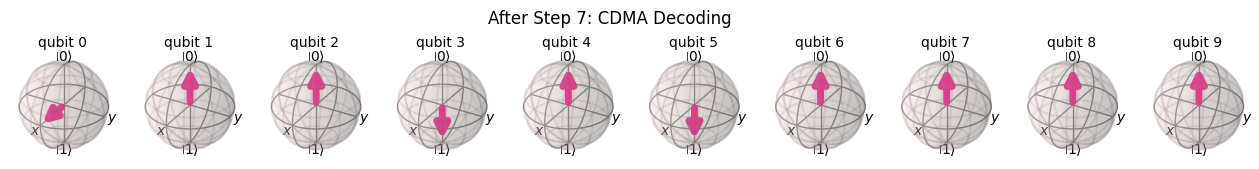

In [63]:
qc.cx(0, 4)
sv_CDMA_Decoding = Statevector.from_instruction(qc)
show_statevec(sv_CDMA_Decoding, "After Step 7: CDMA Decoding")


After Step 7: CDMA Decoding
|0000101000>  (0.7071067811865471+1.5407439555097883e-33j)
|0000101001>  (0.707106781186547-2.065674716607785e-17j)


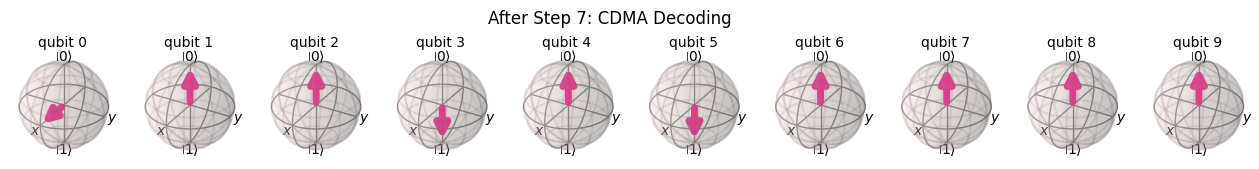

In [64]:
qc.cx(1, 3)
sv_CDMA_Decoding = Statevector.from_instruction(qc)
show_statevec(sv_CDMA_Decoding, "After Step 7: CDMA Decoding")


After Step 7: CDMA Decoding
|0000101000>  (0.7071067811865471+1.5407439555097883e-33j)
|0000101001>  (0.707106781186547-2.065674716607785e-17j)


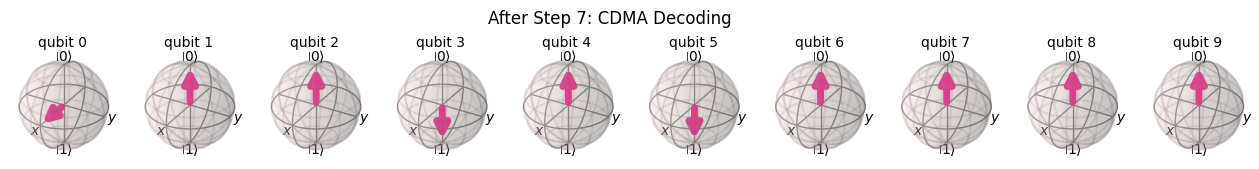

In [65]:
qc.cx(1, 5)
sv_CDMA_Decoding = Statevector.from_instruction(qc)
show_statevec(sv_CDMA_Decoding, "After Step 7: CDMA Decoding")


After Step 7: CDMA Decoding
|0000101000>  (0.7071067811865471+1.5407439555097883e-33j)
|0000111101>  (0.707106781186547-2.065674716607785e-17j)


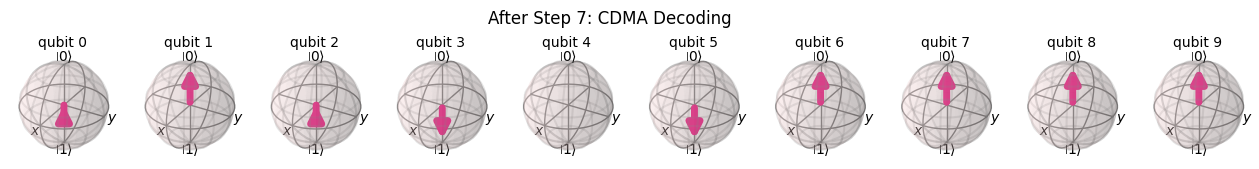

Figure(1374.44x953.167)


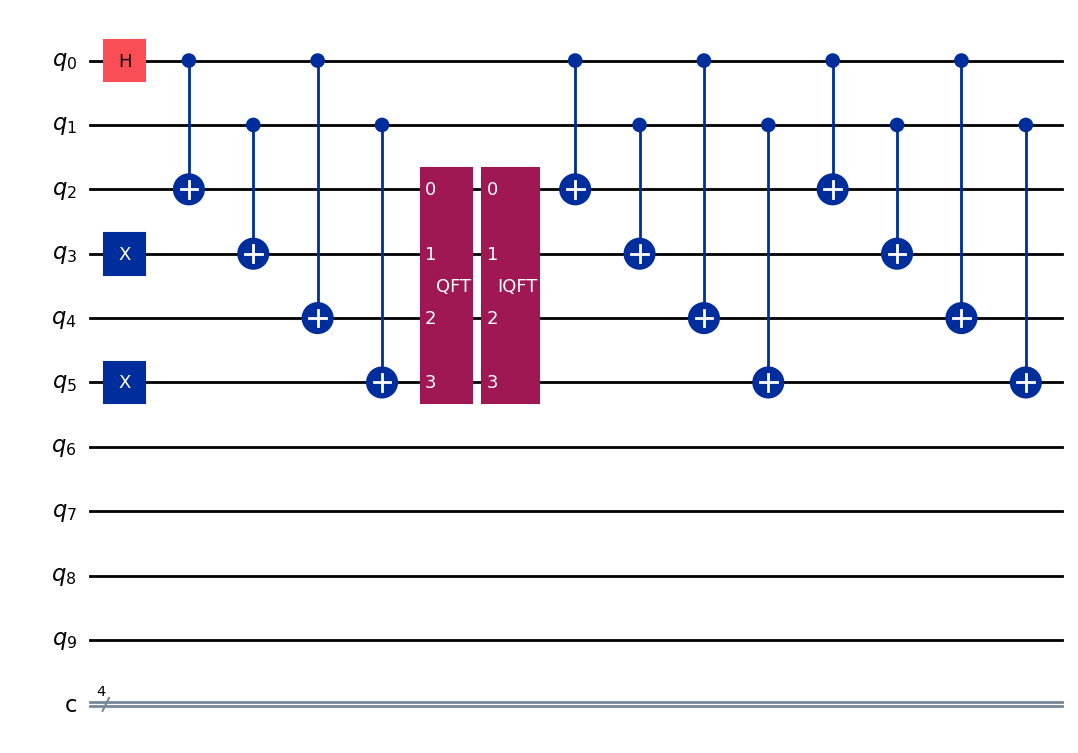

In [66]:
# CDMA Decode Apply CNOT again as like Encode because: CNOT(CNOT)=original
qc.cx(0, 2)
qc.cx(0, 4)
qc.cx(1, 3)
qc.cx(1, 5)

sv_CDMA_Decoding = Statevector.from_instruction(qc)
show_statevec(sv_CDMA_Decoding, "After Step 7: CDMA Decoding")
print(qc.draw('mpl'))
plt.show()

In [67]:
if np.allclose(sv_before_QFT_CDMA_Encoding.data, sv_after_IQFT.data):
    print("\n✅ Circuit proof: QFT * IQFT = Identity")
else:
    print("\n❌ Circuit proof: QFT * IQFT != Identity")



✅ Circuit proof: QFT * IQFT = Identity


In [68]:
if np.allclose(sv_before_QFT_CDMA_Encoding.data, sv_CDMA_Decoding.data):
    print("\n✅ Circuit proof: CDMA_Encoding * CDMA_Decoding  = Identity")
else:
    print("\n❌ Circuit proof:CDMA_Encoding * CDMA_Decoding  != Identity")


✅ Circuit proof: CDMA_Encoding * CDMA_Decoding  = Identity


Figure(1708.89x953.167)


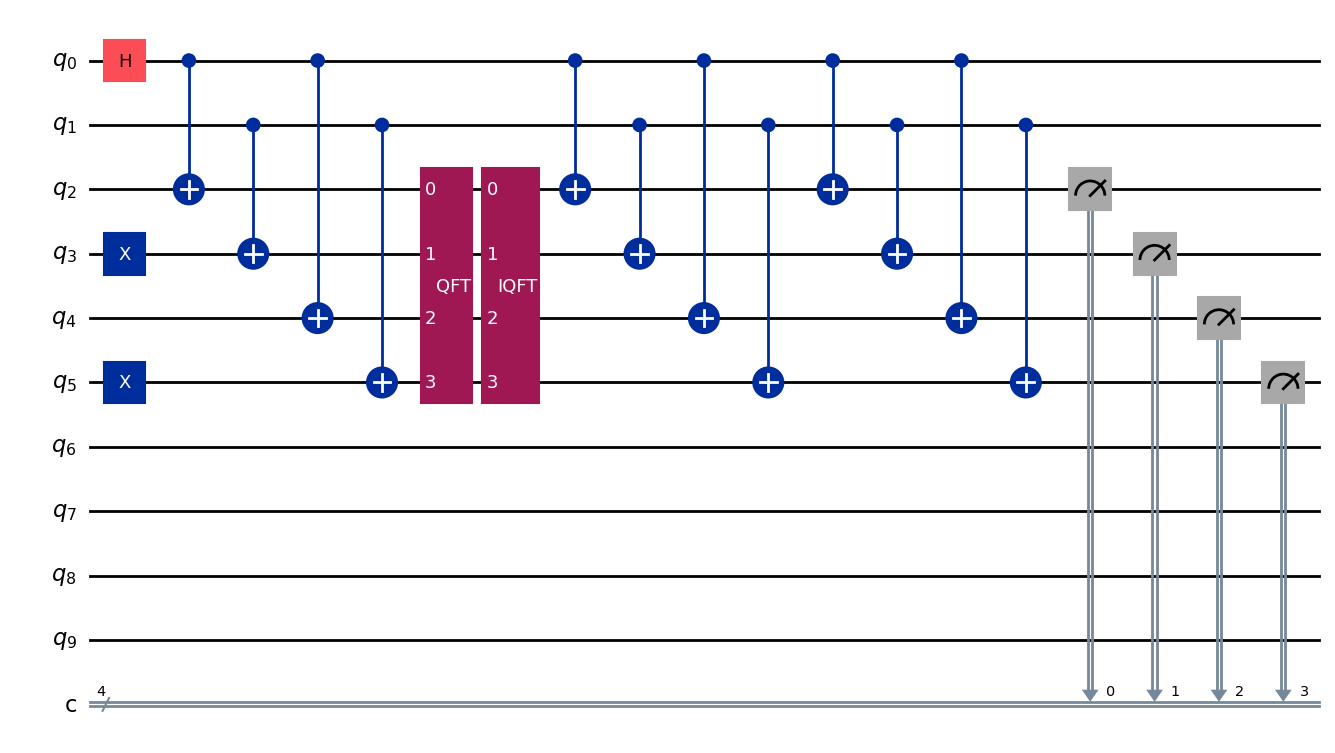

In [69]:
#qc.measure([2,3,4,5], [0,1,2,3])
qc.measure(2,0)
qc.measure(3,1)
qc.measure(4,2)
qc.measure(5,3)
print(qc.draw('mpl'))
plt.show()

In [70]:
from qiskit_aer import AerSimulator
from qiskit import transpile
# To Simulate and Run
sim = AerSimulator()
job = sim.run(transpile(qc, sim), shots=1024)
counts = job.result().get_counts()

print("\nMeasurement results of (C1x,C1y,C2x,C2y):")
print(counts)



Measurement results of (C1x,C1y,C2x,C2y):
{'1010': 503, '1111': 521}
